## DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION 
# GRIPMAY21

### Author: MANSI SHARMA

### TASK 5: Exploratory Data Analysis - Sports

___Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’___
___As a sports analysts, find out the most successful teams, players and factors contributing to win or loss of a team.___

In [1]:
#Importing the Header Files
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
matches = pd.read_csv('C:/Users/91962/Desktop/DB OF PLACEMENT DRIVES/resume/MY INTERNSHIP/SPARKS FOUNDATION/match/matches.csv')
print("Data imported successfully")

Data imported successfully


In [5]:
#GETTING FIRST 5 ROWS
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
# check for null values
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
# dropping the umpire columns to get rid of null values
matches = matches.drop(['umpire3'],axis=1)

In [8]:
#to get rows and columns
matches.shape
#Total matches played = 756¶

(756, 17)

In [9]:
#unique sesons
len(matches['season'].unique())

12

In [10]:
#total teams=15
pd.concat([matches['team1'],matches['team2']]).unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

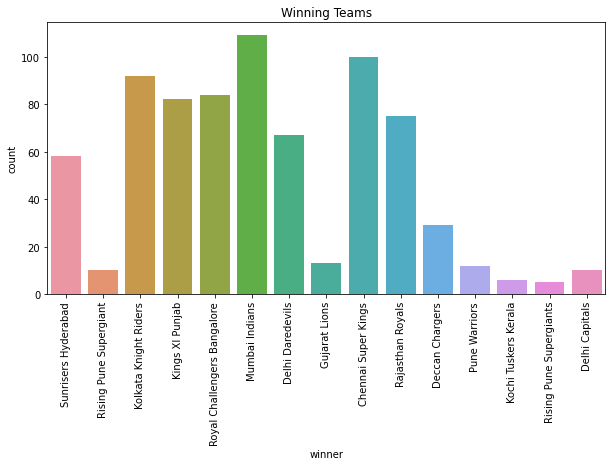

In [11]:
#Winning Teams
plt.figure(figsize = (10,5))
sns.countplot(x = 'winner', data = matches)
plt.title('Winning Teams')
plt.xticks(rotation = 90);


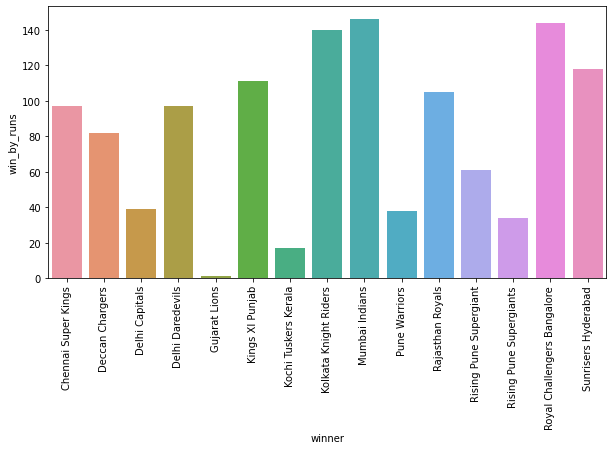

In [12]:
#Win by runs
win_max=matches.groupby(['winner'],as_index=False)['win_by_runs'].max()
plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(win_max['winner'],win_max['win_by_runs'])


__The above graphs clearly shows Mumbai Indians is the team with most wins.__


## Man of the Match Winners 

In [15]:
matches['player_of_match'].value_counts()[0:5]

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
Name: player_of_match, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

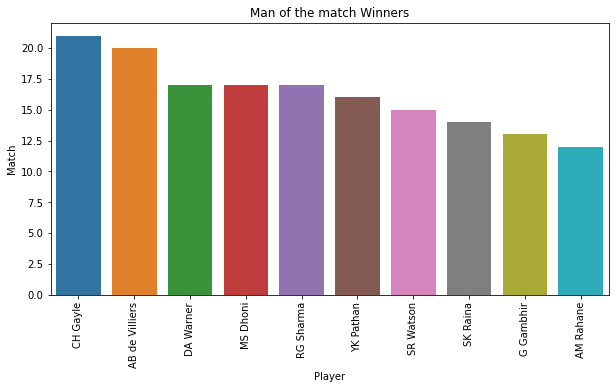

In [16]:
plt.figure(figsize = (10,5))
sns.barplot(x= matches.player_of_match.value_counts()[:10].index, y= matches.player_of_match.value_counts()[:10])
plt.title('Man of the match Winners')
plt.xlabel('Player')
plt.ylabel('Match')
plt.xticks(rotation = 90)

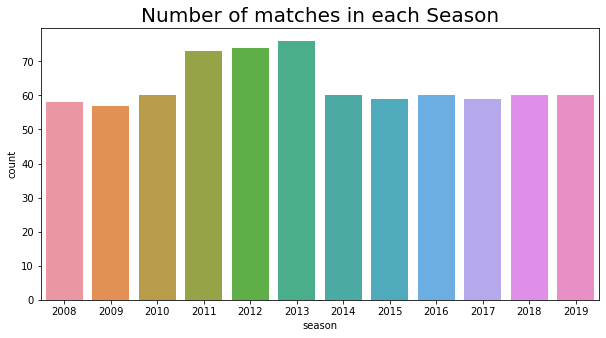

In [13]:
plt.subplots(figsize=(10,5))
sns.countplot(x = matches['season'].sort_values())
plt.title('Number of matches in each Season', fontsize = 20)
plt.show()

__Chris Gayle and Ab de Villers are the best players.__
### Number of matches in each season

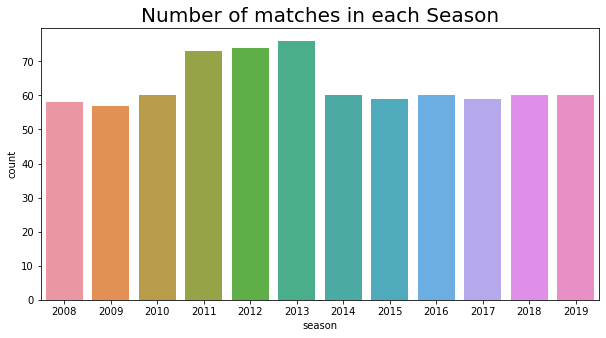

In [17]:
plt.subplots(figsize=(10,5))
sns.countplot(x = matches['season'].sort_values())
plt.title('Number of matches in each Season', fontsize = 20)
plt.show()

### TOSS WINNERS

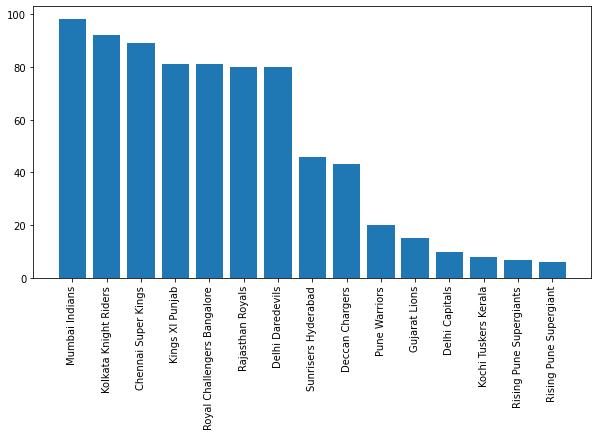

In [14]:
plt.figure(figsize=(10,5))
plt.bar(list(matches['toss_winner'].value_counts().keys()),list(matches['toss_winner'].value_counts()))
plt.xticks(rotation = 90)
plt.show()

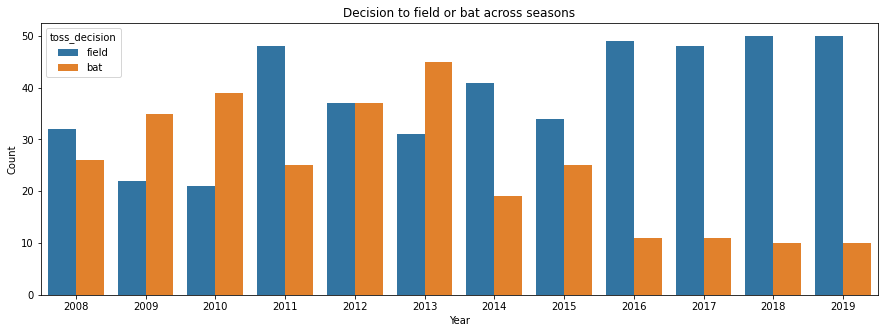

In [18]:
#Comparing the Toss Decisions

plt.figure(figsize=(15,5))
sns.countplot(matches['season'].sort_values(), hue = matches['toss_decision'])
plt.title("Decision to field or bat across seasons")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

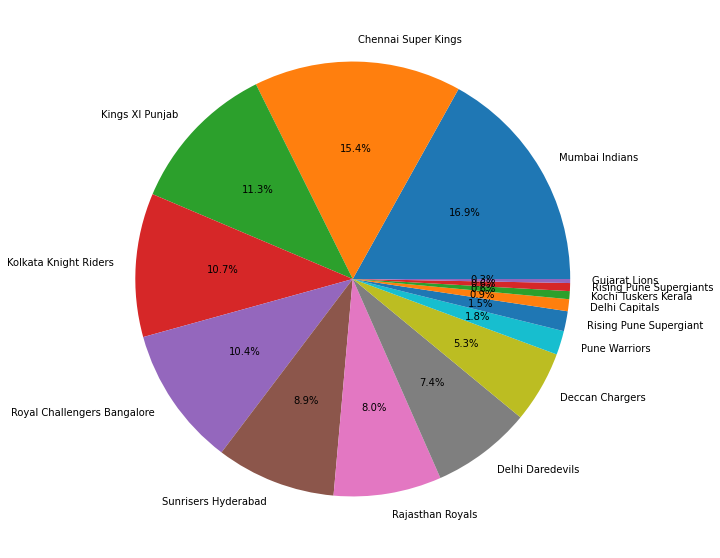

In [19]:
#When a team wins after batting on first position
batting_first = matches[matches['win_by_runs']!=0]
plt.figure(figsize=(10,10))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys())
        ,autopct='%0.1f%%')
plt.show()

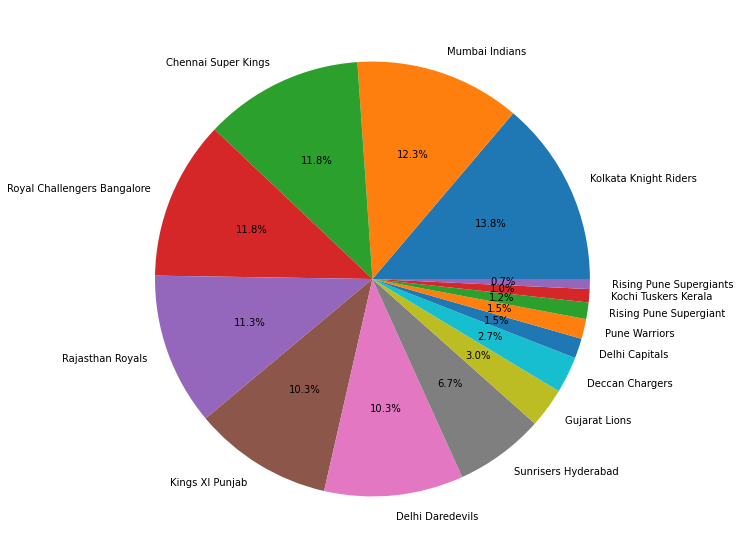

In [20]:
#When a team wins after batting on second position

batting_second = matches[matches['win_by_wickets']!=0]
plt.figure(figsize = (10,10))
plt.pie(list(batting_second['winner'].value_counts()), labels=list(batting_second['winner'].value_counts().keys())
        ,autopct = '%0.1f%%')
plt.show()

### Match Venues

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

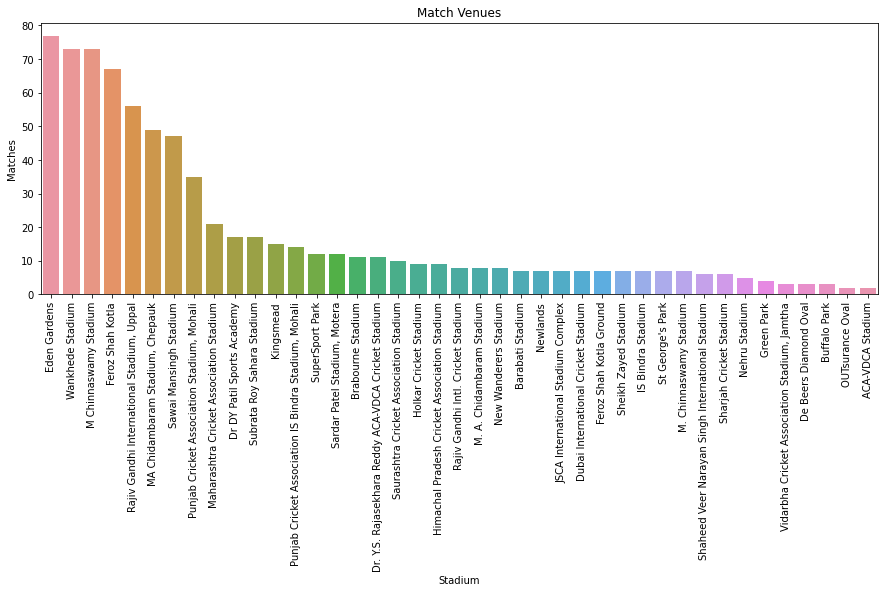

In [21]:
plt.subplots(figsize=(15,5))
sns.countplot(x ='venue',data = matches,order = matches['venue'].value_counts().index)
plt.title('Match Venues')
plt.xlabel('Stadium')
plt.ylabel('Matches')
plt.xticks(rotation = 90)

__Eden Garden is the most popular venue__

# Analysis of deliveries dataset

In [29]:
dataset = pd.read_csv('C:/Users/91962/Desktop/DB OF PLACEMENT DRIVES/resume/MY INTERNSHIP/SPARKS FOUNDATION/match/DELIEVER.csv')
print("Data imported successfully")

Data imported successfully


In [31]:
#The Total no of rows and columns in deliveries dataset is 
dataset.shape

(179078, 21)

In [32]:
dataset.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [33]:
# Total matches where Super over was and wasn't played
deliveries['is_super_over'].value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

In [34]:
# total overall runs given by Extra
sum(deliveries['extra_runs'])

12004

In [35]:
# Total runs given by no balls
sum(deliveries['noball_runs'])

749

In [36]:
# Total runs given by penalty
sum(deliveries['penalty_runs'])

10

In [37]:
# Total soft-dissmisal of players over the years
sum(deliveries['player_dismissed'].value_counts())

8834

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

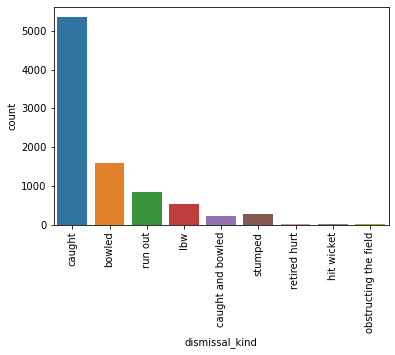

In [38]:
# kinds of dismissal
sns.countplot(x = deliveries['dismissal_kind'], data = deliveries)
plt.xticks(rotation = 90)

1. Most successful Teams : Mumbai Indians and Chennai Super Kings
2. Best player: Chris Gayle and Ab de Villers.
3. factors on which the win depends: winning a toss, opt field or bat etc.